In [14]:
# panggil library pandas
import pandas as pd
# baca dataset
df = pd.read_csv("dataset.csv")
# tampilkan dataframe
df


,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang
5,4,10,7,0,penyerang
6,9,5,2,2,penyerang
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [16]:
# menampilkan 5 data teratas
df.head()
# menampilkan 5 data terbawah
df.tail()
# melihat struktur data (kolom, tipe, jumlah baris, memori)
print(df.info())
# melihat statistik ringkas untuk kolom numeric (min, max, mean, dll)
print(df.describe())
# mengecek apakah ada data yang kosong
print(df.isnull().sum())
# mengecek jumlah data per role
print(df["role"].value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kill    10 non-null     int64 
 1   assist  10 non-null     int64 
 2   death   10 non-null     int64 
 3   turret  10 non-null     int64 
 4   role    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
            kill     assist      death     turret
count  10.000000  10.000000  10.000000  10.000000
mean    6.200000   7.300000   4.100000   1.000000
std     4.211096   4.110961   1.911951   1.154701
min     1.000000   2.000000   2.000000   0.000000
25%     2.250000   4.000000   2.250000   0.000000
50%     6.000000   7.000000   4.000000   0.500000
75%     9.750000  10.750000   5.750000   2.000000
max    12.000000  13.000000   7.000000   3.000000
kill      0
assist    0
death     0
turret    0
role      0
dtype: int64
role
penyerang    6
bertahan     4
Name: count, dtype: int64


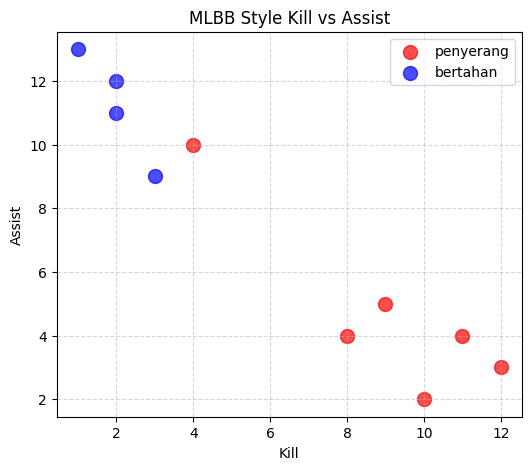

In [17]:
# import library matplotlib
import matplotlib.pyplot as plt
# pisahkan data berdasarkan role penyerang dan bertahan
penyerang = df[df["role"] =="penyerang"]
bertahan = df[df["role"] =="bertahan"]
# buat canvas dengan ukuran 6x5 inch
plt.figure(figsize=(6,5))
# scatter plot untuk penyerang (merah, titik besar, agak transparan)
plt.scatter(penyerang["kill"], penyerang["assist"], color="red", s=100, alpha=0.7, label="penyerang")
# scatter plot untuk bertahan (biru, titik besar, agak transparan)
plt.scatter(bertahan["kill"], bertahan["assist"], color="blue", s=100, alpha=0.7, label="bertahan")
# label untuk sumbu x
plt.xlabel("Kill")
# label untuk sumbu y
plt.ylabel("Assist")
# judul grafik
plt.title("MLBB Style Kill vs Assist")
# tampilkan kotak keterangan warna (penyerang/ bertahan)
plt.legend()
# tampilkan grid putus-putus tipis
plt.grid(True, linestyle="--", alpha=0.5)
# tampilkan grafik ke layar
plt.show()


In [19]:
# import Logistic Regression dari library Scikit-Learn
from sklearn.linear_model import LogisticRegression
# import fungsi train_test_split untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
# import accuracy_score untuk mengukur akurasi model (berapa prediksi benar dibanding totalnya)
from sklearn.metrics import accuracy_score
# pilih features yang akan digunakan
X = df[["kill","assist","death","turret"]]
# pilih target yang ingin diprediksi (penyerang/bertahan)
y = df["role"]
# bagi dataset menjadi data latih 80%, data uji 20%, dengan random_state 42 agar hasil selalu sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# buat objek model Logistic Regression
model = LogisticRegression()
# latih model menggunakan data latih X_train dan y_train
model.fit(X_train, y_train)
# gunakan model yang sudah dilatih untuk memprediksi role di data uji X_test
y_pred = model.predict(X_test)
# cetak nilai akurasi, yaitu seberapa sering prediksi sama dengan data asli
print("Accuracy :", accuracy_score(y_test, y_pred))



Accuracy : 1.0


In [20]:
data_baru = pd.DataFrame([[1,12,7,0]], columns=["kill","assist","death","turret"])
model.predict(data_baru)


array(['bertahan'], dtype=object)

In [21]:
model.predict(data_baru)[0]


'bertahan'

In [22]:
# panggil library joblib
import joblib
# simpan model ke dalam format .joblib dengan nama “mlbb_model”
joblib.dump(model, "mlbb_model.joblib")


['mlbb_model.joblib']

In [27]:
# panggil library joblib
import joblib
# panggil library pandas untuk menyiapkan data uji
import pandas as pd
# load model yang sudah tersimpan
loaded_model = joblib.load("mlbb_model.joblib")
# siapkan data baru untuk prediksi
data_baru = pd.DataFrame([[3,9,5,1]], columns=["kill","assist","death","turret"])
# lakukan proses prediksi
loaded_model.predict(data_baru)


array(['bertahan'], dtype=object)

SyntaxError: unmatched ')' (2054717317.py, line 13)